In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

## removing dodgy images

In [3]:
import cv2
import imghdr #check extention of images

/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_13861/1396448599.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr #check extention of images


In [4]:
data_dir = "data"
extentions = ['jpeg','png','bmp','jpg']

In [5]:
#directory check
os.listdir(data_dir)
#all images in particular folder
os.listdir(os.path.join(data_dir,'happy'))

['images26.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images30.jpg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'maxresdefault2.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'happy-people-1024x768.jpeg',
 '1902540.jpg',
 'hqdefault.jpg',
 'image19.jpeg',
 'images36.jpg',
 'images22.jpg',
 'tmp_6mv7xy_5d5b15258a50

Also go through data folder and filter with size and remove small images(img<8kb) 

In [6]:
img= cv2.imread(os.path.join('data','happy','154006829.jpg'))

(3744, 5616, 3)


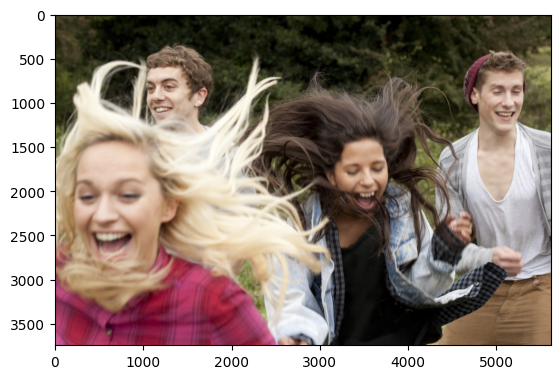

In [7]:
import matplotlib.pyplot as plt
print(img.shape )
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # cv2 take the color as bgr instead of rgb so we have to fix it
#plt.show()

In [8]:
for image_class in os.listdir(data_dir): #data directory
    if os.path.isdir(image_class):
        print(image_class)
        for image in os.listdir(os.path.join(data_dir,image_class)): # data + happy/sad
            image_path = os.path.join(data_dir,image_class, image) #images
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path) #extention of img
                if tip not in extentions:
                    print("no extention {}".format(image_path))
                    os.remove(image_path)                 
            except Exception as e:
                print("issues with image:{} on {} ".format(e,image_path))

 # load the data with tensorflow data pipeline (dataset API)
 ### https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [9]:
import tensorflow as tf
#tf.data.Dataset?? 
data = tf.keras.utils.image_dataset_from_directory('data') #can say its datapipeline

Found 170 files belonging to 2 classes.


2024-06-22 17:54:52.461138: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-22 17:54:52.461159: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-22 17:54:52.461169: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-22 17:54:52.461187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-22 17:54:52.461198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
#as  we are using api its not loaded on the memory so we have to use numpy iterator 
# to get images from this generator
data_iterator = data.as_numpy_iterator()


In [11]:
batch = data_iterator.next()

In [12]:
data_iterator = data.as_numpy_iterator() #can say accessing pipeline

In [13]:
#everytime you run there will be a new batch
batch = data_iterator.next() # getting batch back

In [14]:
#when you use this api basic parameters:
# you can change by tf.keras.utils.image_dataset_from_directory('data',batch_size =8,...)
#tf.keras.utils.image_dataset_from_directory?? 

In [15]:
len(batch) #images,labels

2

In [16]:
batch[1].shape # labels
#batch[0].shape # image s

(32,)

In [17]:
batch[1]

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

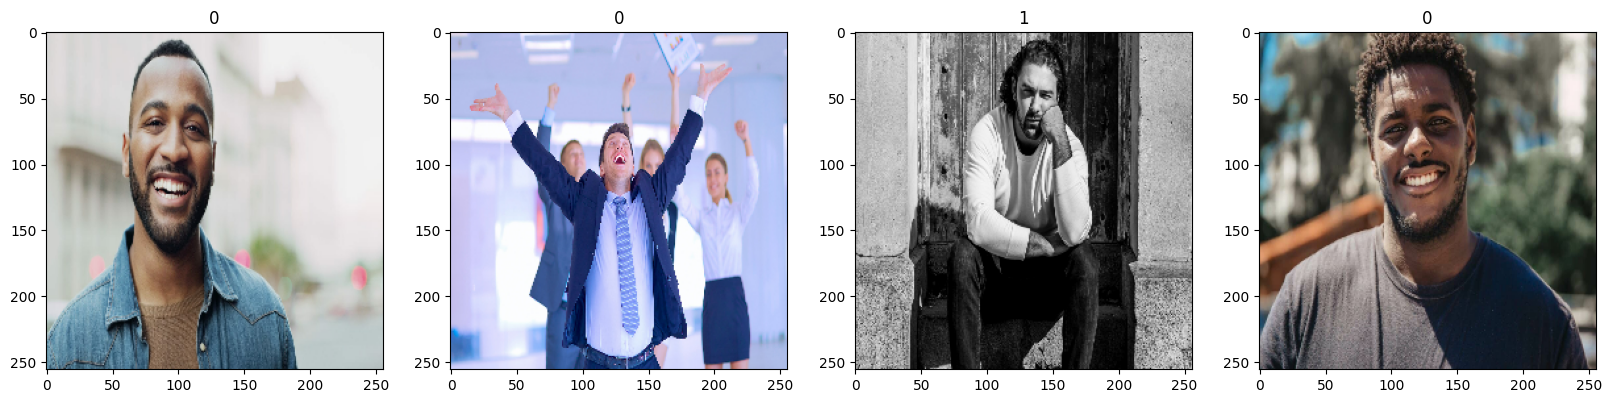

In [18]:
#check which is happy class and sad represents like 0 or 1
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols =4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
#class 0 = happy and class 1 = sad

# Prepare data

## we have to scale data as now values are 0 to 255, and its hard fot NN to analyze
## As we are using a datapipleline(generator) we can not do all together..
## so we use their fnction while we load the data.

In [20]:
#batch
#batch[0]
#batch[1]

In [21]:
# run previous block to understand x(batch[0]) and y
data = data.map(lambda x,y:(x/255,y))

In [22]:
data.as_numpy_iterator().next()[0].max()

1.0

In [23]:
#spliting
#spliting by batches but there will be no left in test we add 1 to val and test

In [24]:
#First calculation
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

4

In [26]:
#apply calculation by using api methods - skip and take(go to link and read)
train = data.take(train_size)
val   =  data.skip(train_size).take(val_size)
test =  data.skip(train_size+val_size).take(test_size)

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Building

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
# Define the input shape for the first layer
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Add more convolutional and pooling layers
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile('adam', loss = tf.losses.BinaryFocalCrossentropy, metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
logdir = 'logs'

In [34]:
# check detailed how model worked
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/tensorboard.py:668: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryFocalCrossentropy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")
2024-06-22 17:54:54.516105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - accuracy: 0.5604 - loss: 0.5034 - val_accuracy: 0.5625 - val_loss: 0.1771
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.6167 - loss: 0.1723 - val_accuracy: 0.8438 - val_loss: 0.1441
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.8031 - loss: 0.1381 - val_accuracy: 0.8750 - val_loss: 0.1088
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.7479 - loss: 0.1250 - val_accuracy: 0.7812 - val_loss: 0.1184
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.7948 - loss: 0.1024 - val_accuracy: 1.0000 - val_loss: 0.0817
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.9365 - loss: 0.0781 - val_accuracy: 0.9062 - val_loss: 0.0716
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - accuracy: 0.8979 - loss: 0.0777 - val_accuracy: 0.9375 - val_loss: 0.0498
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 0.9375 - loss: 0.0612 - val_accuracy: 0.9062 - val_loss: 0.0661
Epo

In [36]:
hist.history

{'accuracy': [0.5390625,
  0.6328125,
  0.796875,
  0.7578125,
  0.84375,
  0.890625,
  0.8671875,
  0.8984375,
  0.9453125,
  0.953125,
  0.984375,
  0.9453125,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.5137737989425659,
  0.16584642231464386,
  0.1398245245218277,
  0.12154782563447952,
  0.10107795894145966,
  0.08488313108682632,
  0.08658773452043533,
  0.06810562312602997,
  0.05528566241264343,
  0.04209483414888382,
  0.024304136633872986,
  0.029311643913388252,
  0.017885122448205948,
  0.017140865325927734,
  0.01587078720331192,
  0.007004535757005215,
  0.007902920246124268,
  0.0037301252596080303,
  0.003191643860191107,
  0.001513334340415895],
 'val_accuracy': [0.5625,
  0.84375,
  0.875,
  0.78125,
  1.0,
  0.90625,
  0.9375,
  0.90625,
  0.9375,
  0.96875,
  1.0,
  0.9375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.17705756425857544,
  0.14411397278308868,
  0.10875105857849121,
  0.11839468777179718,
  0.

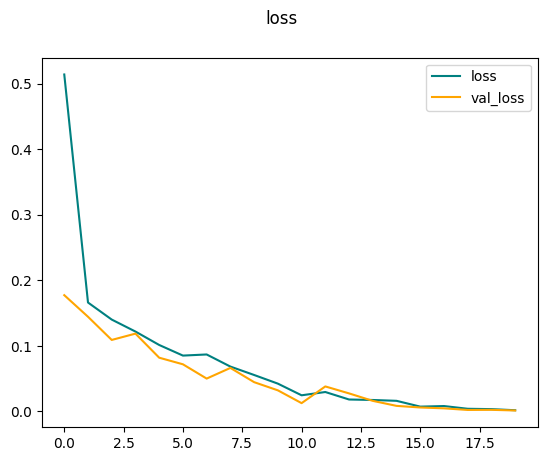

In [37]:
#lets plot these to make more interesting to look
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss')
plt.legend(loc="upper right")
plt.show()

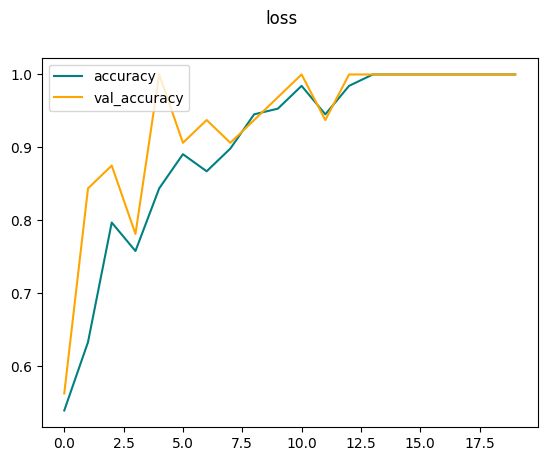

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('loss')
plt.legend(loc="upper left")
plt.show()

# evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-06-22 17:55:20.297523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


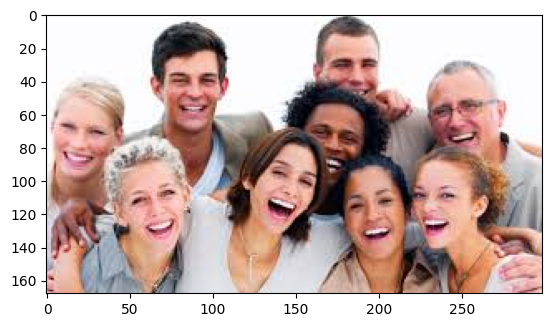

In [79]:
img = cv2.imread('happy2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show() 

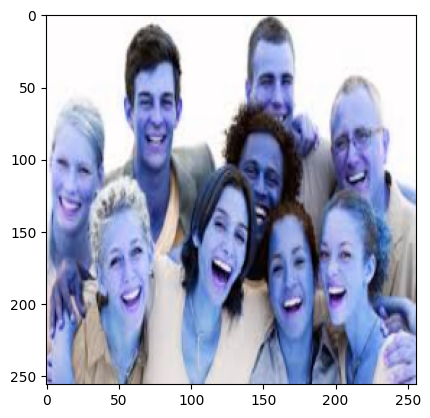

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [82]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [95]:
from tensorflow.keras.models import load_model

In [97]:
model.save('Happy-sad.h5')

TypeError: BinaryFocalCrossentropy.get_config() missing 1 required positional argument: 'self'